In [45]:
import tensorflow as tf
from tensorflow.keras import layers, losses
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
import os
from glob2 import glob
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [61]:
tf.config.experimental.list_physical_devices('CPU')

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [3]:
train_dir = 'dataset/nomal_data/train'
test_dir = 'dataset/nomal_data/test'
# val_dir = 'dataset/nomal_data/val'
an_dir = 'data1/anomal_data/'
image_size = (48, 48)
batch_size = 64

In [20]:
datagen = ImageDataGenerator(rescale=1. / 255)

train_gen = datagen.flow_from_directory(train_dir,
                                        target_size=image_size,
                                        batch_size=batch_size,
                                        color_mode='grayscale',
                                        class_mode='input',
                                        shuffle=True)

test_gen = datagen.flow_from_directory(test_dir,
                                       target_size=image_size,
                                       batch_size=batch_size,
                                       color_mode='grayscale',
                                       class_mode='input')

# val_gen = datagen.flow_from_directory(val_dir,
#                                       target_size=image_size,
#                                       batch_size=batch_size,
#                                       color_mode='grayscale',
#                                       class_mode='input')

an_gen = datagen.flow_from_directory(an_dir,
                                     target_size=image_size,
                                     batch_size=batch_size,
                                     color_mode='grayscale',
                                     class_mode='input')

Found 411 images belonging to 1 classes.
Found 96 images belonging to 1 classes.
Found 22 images belonging to 1 classes.


In [67]:
class convolutional(Model):
    def __init__(self):
        super(convolutional, self).__init__()
        self.encoder = tf.keras.Sequential([
            layers.Conv2D(64, (3, 3), activation='relu', padding='same', strides=2),
            layers.Conv2D(32, (3, 3), activation='relu', padding='same', strides=2),
            layers.Conv2D(16, (3, 3), activation='relu', padding='same', strides=2)])

        self.decoder = tf.keras.Sequential([
           layers.Conv2DTranspose(16, kernel_size=3, strides=2, activation='relu', padding='same'),
           layers.Conv2DTranspose(32, kernel_size=3, strides=2, activation='relu', padding='same'),
           layers.Conv2DTranspose(64, kernel_size=3, strides=2, activation='relu', padding='same'),
           layers.Conv2D(1, kernel_size=(3, 3), activation='sigmoid', padding='same')])

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

autoencoder3 = convolutional()
autoencoder3.compile(optimizer='adam', loss='mae')
autoencoder3.build((64,48,48,1))
autoencoder3.summary()

Model: "convolutional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_28 (Sequential)   multiple                  23728     
_________________________________________________________________
sequential_29 (Sequential)   multiple                  26033     
Total params: 49,761
Trainable params: 49,761
Non-trainable params: 0
_________________________________________________________________


In [117]:
history=autoencoder3.fit(train_gen,
                epochs=400,
#                 batch_size=64,
                shuffle=True,
                validation_data=test_gen,
                )

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 7 steps, validate for 2 steps
Epoch 1/400
7/7 [==============================] - 2s 230ms/step - loss: 0.0094 - val_loss: 0.0073
Epoch 2/400
7/7 [==============================] - 2s 242ms/step - loss: 0.0094 - val_loss: 0.0069
Epoch 3/400
7/7 [==============================] - 2s 232ms/step - loss: 0.0092 - val_loss: 0.0067
Epoch 4/400
7/7 [==============================] - 2s 227ms/step - loss: 0.0091 - val_loss: 0.0067
Epoch 5/400
7/7 [==============================] - 2s 221ms/step - loss: 0.0090 - val_loss: 0.0065
Epoch 6/400
7/7 [==============================] - 2s 218ms/step - loss: 0.0090 - val_loss: 0.0064
Epoch 7/400
7/7 [==============================] - 2s 224ms/step - loss: 0.0090 - val_loss: 0.0064
Epoch 8/400
7/7 [==============================] - 2s 241ms/step - loss: 0.0091 - val_loss: 0.0068
Epoch 9/400
7/7 [==============================] - 2s 226ms/step - loss: 0.0092 - val_loss: 0.0065
Epoch 10/400
7/7 [=

Epoch 81/400
7/7 [==============================] - 2s 252ms/step - loss: 0.0092 - val_loss: 0.0063
Epoch 82/400
7/7 [==============================] - 2s 237ms/step - loss: 0.0091 - val_loss: 0.0063
Epoch 83/400
7/7 [==============================] - 2s 248ms/step - loss: 0.0091 - val_loss: 0.0069
Epoch 84/400
7/7 [==============================] - 2s 244ms/step - loss: 0.0090 - val_loss: 0.0066
Epoch 85/400
7/7 [==============================] - 2s 241ms/step - loss: 0.0091 - val_loss: 0.0063
Epoch 86/400
7/7 [==============================] - 2s 235ms/step - loss: 0.0090 - val_loss: 0.0065
Epoch 87/400
7/7 [==============================] - 2s 250ms/step - loss: 0.0089 - val_loss: 0.0066
Epoch 88/400
7/7 [==============================] - 2s 234ms/step - loss: 0.0091 - val_loss: 0.0063
Epoch 89/400
7/7 [==============================] - 2s 244ms/step - loss: 0.0091 - val_loss: 0.0067
Epoch 90/400
7/7 [==============================] - 2s 250ms/step - loss: 0.0089 - val_loss: 0.0063


7/7 [==============================] - 2s 259ms/step - loss: 0.0090 - val_loss: 0.0069
Epoch 163/400
7/7 [==============================] - 2s 238ms/step - loss: 0.0090 - val_loss: 0.0062
Epoch 164/400
7/7 [==============================] - 2s 252ms/step - loss: 0.0087 - val_loss: 0.0064
Epoch 165/400
7/7 [==============================] - 2s 261ms/step - loss: 0.0092 - val_loss: 0.0062
Epoch 166/400
7/7 [==============================] - 2s 276ms/step - loss: 0.0089 - val_loss: 0.0066
Epoch 167/400
7/7 [==============================] - 2s 291ms/step - loss: 0.0089 - val_loss: 0.0065
Epoch 168/400
7/7 [==============================] - 2s 260ms/step - loss: 0.0090 - val_loss: 0.0062
Epoch 169/400
7/7 [==============================] - 2s 245ms/step - loss: 0.0090 - val_loss: 0.0063
Epoch 170/400
7/7 [==============================] - 2s 232ms/step - loss: 0.0088 - val_loss: 0.0062
Epoch 171/400
7/7 [==============================] - 2s 269ms/step - loss: 0.0088 - val_loss: 0.0062
Epoc

7/7 [==============================] - 2s 247ms/step - loss: 0.0089 - val_loss: 0.0064
Epoch 244/400
7/7 [==============================] - 2s 239ms/step - loss: 0.0087 - val_loss: 0.0061
Epoch 245/400
7/7 [==============================] - 2s 238ms/step - loss: 0.0087 - val_loss: 0.0061
Epoch 246/400
7/7 [==============================] - 2s 251ms/step - loss: 0.0088 - val_loss: 0.0063
Epoch 247/400
7/7 [==============================] - 2s 251ms/step - loss: 0.0088 - val_loss: 0.0066
Epoch 248/400
7/7 [==============================] - 2s 235ms/step - loss: 0.0088 - val_loss: 0.0063
Epoch 249/400
7/7 [==============================] - 2s 244ms/step - loss: 0.0088 - val_loss: 0.0064
Epoch 250/400
7/7 [==============================] - 2s 243ms/step - loss: 0.0087 - val_loss: 0.0064
Epoch 251/400
7/7 [==============================] - 2s 237ms/step - loss: 0.0088 - val_loss: 0.0062
Epoch 252/400
7/7 [==============================] - 2s 238ms/step - loss: 0.0086 - val_loss: 0.0063
Epoc

7/7 [==============================] - 2s 266ms/step - loss: 0.0088 - val_loss: 0.0064
Epoch 325/400
7/7 [==============================] - 2s 270ms/step - loss: 0.0087 - val_loss: 0.0061
Epoch 326/400
7/7 [==============================] - 2s 244ms/step - loss: 0.0087 - val_loss: 0.0060
Epoch 327/400
7/7 [==============================] - 2s 241ms/step - loss: 0.0086 - val_loss: 0.0062
Epoch 328/400
7/7 [==============================] - 2s 236ms/step - loss: 0.0087 - val_loss: 0.0067
Epoch 329/400
7/7 [==============================] - 2s 234ms/step - loss: 0.0087 - val_loss: 0.0062
Epoch 330/400
7/7 [==============================] - 2s 250ms/step - loss: 0.0086 - val_loss: 0.0063
Epoch 331/400
7/7 [==============================] - 2s 248ms/step - loss: 0.0086 - val_loss: 0.0061
Epoch 332/400
7/7 [==============================] - 2s 243ms/step - loss: 0.0087 - val_loss: 0.0060
Epoch 333/400
7/7 [==============================] - 2s 249ms/step - loss: 0.0086 - val_loss: 0.0062
Epoc

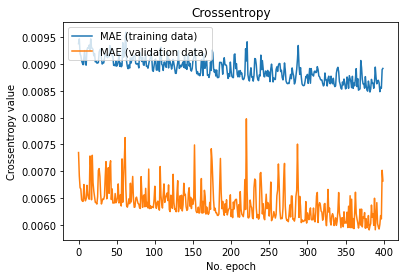

In [118]:
plot1 = plt.figure(1)
plt.plot(history.history['loss'], label='MAE (training data)')
plt.plot(history.history['val_loss'], label='MAE (validation data)')
plt.title('Crossentropy')
plt.ylabel('Crossentropy value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")

plt.show()

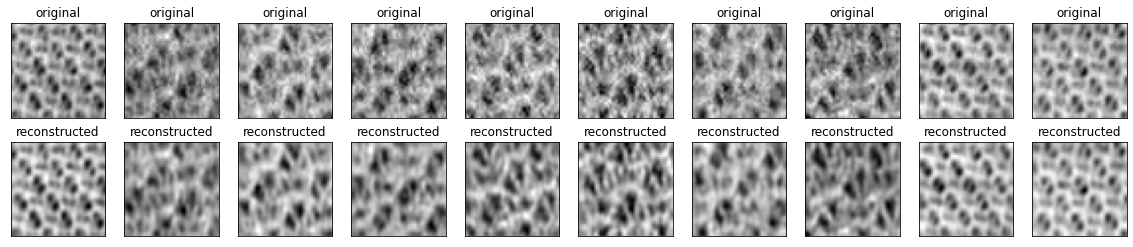

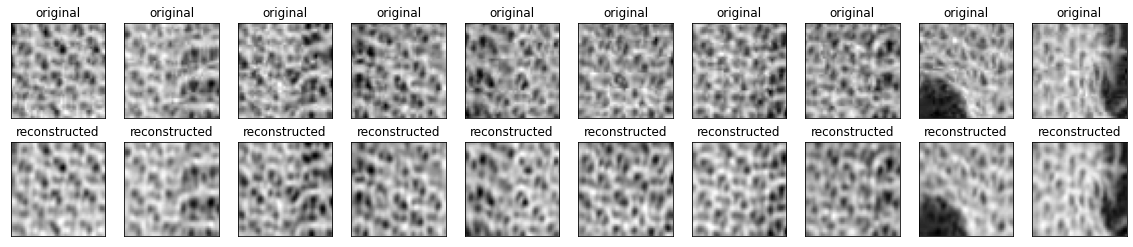

In [119]:
def show_imgs(xs, decoded_imgs):
    n = 10
    plt.figure(figsize=(20, 4))
    for i in range(n):
        # display original
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(xs[i].squeeze())
        plt.title("original")
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # display reconstruction
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(decoded_imgs[i].squeeze())
        plt.title("reconstructed")
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

xs, ys = next(train_gen)
encoded_imgs = autoencoder3.encoder(xs).numpy()
decoded_imgs = autoencoder3.decoder(encoded_imgs).numpy()
K.int_shape(decoded_imgs.squeeze())
show_imgs(xs, decoded_imgs)    
    
xs, ys = next(an_gen)
encoded_imgs = autoencoder3.encoder(xs).numpy()
decoded_imgs = autoencoder3.decoder(encoded_imgs).numpy()
K.int_shape(decoded_imgs.squeeze())
show_imgs(xs, decoded_imgs)

In [111]:
autoencoder3.save('./model/cnn')
# tf.keras.models.save_model()

INFO:tensorflow:Assets written to: ./model/cnn\assets


In [63]:
# %load "test/test.py"  
import cv2
import tensorflow as tf
import numpy as np
from os import listdir
from os.path import join
import time

model = tf.keras.models.load_model('./model/cnn')


def cv2tf_img(img):
    img = np.asarray(img)
    img = np.expand_dims(img, axis=-1)
    img = tf.image.convert_image_dtype(img, tf.float32)
    return img


def is_anomal(r, x, threshold):

    return np.square(r - x).mean() >= threshold


def predict(frame, threshold):
    stride = 50
    size =100
    img = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    h, w = img.shape
    num_row = ((h - size) // stride) + 1
    num_col = ((w - size) // stride) + 1

    for i in range(num_row):
        for j in range(num_col):
            eq_img = cv2.equalizeHist(img[i * stride: size + (i * stride), j * stride: size + (j * stride)])
            inp_img = cv2tf_img(eq_img)
            re_img = model.predict(tf.stack([inp_img]))
            if is_anomal(re_img, inp_img, threshold):
                cv2.rectangle(frame, (j * stride, i * stride), (size + (j * stride), size + (i * stride)), (0, 0, 255),
                              -1)

    return frame


if __name__ == '__main__':
    fld = './error/'
    threshold = 0.045
    for i, f in enumerate(listdir(fld)):
        frame = cv2.imread(join(fld, f))
        time_start = time.time()
        frame = predict(frame, threshold)
        time_end = time.time()
        print(f'img-{i} cost time : {time_end - time_start} sec')

        cv2.imwrite(f'./error_result/{i}.bmp', frame)


ValueError: Could not find matching function to call loaded from the SavedModel. Got:
  Positional arguments (2 total):
    * Tensor("x:0", shape=(None, 48, 48, 1), dtype=float32)
    * Tensor("training:0", shape=(), dtype=bool)
  Keyword arguments: {}

Expected these arguments to match one of the following 4 option(s):

Option 1:
  Positional arguments (2 total):
    * TensorSpec(shape=(None, 48, 48, 1), dtype=tf.float32, name='input_1')
    * False
  Keyword arguments: {}

Option 2:
  Positional arguments (2 total):
    * TensorSpec(shape=(None, 48, 48, 1), dtype=tf.float32, name='x')
    * False
  Keyword arguments: {}

Option 3:
  Positional arguments (2 total):
    * TensorSpec(shape=(None, 48, 48, 1), dtype=tf.float32, name='x')
    * True
  Keyword arguments: {}

Option 4:
  Positional arguments (2 total):
    * TensorSpec(shape=(None, 48, 48, 1), dtype=tf.float32, name='input_1')
    * True
  Keyword arguments: {}